In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
#read data 
train_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_data.loc[train_data['LotArea']>8450 ]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
train_data.loc[0:5,'MSSubClass':'Street']

,MSSubClass,MSZoning,LotFrontage,LotArea,Street
0,60,RL,65.0,8450,Pave
1,20,RL,80.0,9600,Pave
2,60,RL,68.0,11250,Pave
3,70,RL,60.0,9550,Pave
4,60,RL,84.0,14260,Pave
5,50,RL,85.0,14115,Pave


In [7]:
x_train_data=train_data.iloc[:,:-1]

In [8]:
y_train_data=train_data.loc[:,'SalePrice']

In [9]:
#check missing values
x_train_data.loc[:,'MiscFeature'].isnull()

0        True
1        True
2        True
3        True
4        True
        ...  
1455     True
1456     True
1457    False
1458     True
1459     True
Name: MiscFeature, Length: 1460, dtype: bool

In [10]:
# Create a boolean mask of missing values
missing_values_mask = x_train_data.isnull()
missing_values_mask.any()


Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MiscVal          False
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
Length: 80, dtype: bool

In [11]:
#columns of missing values
x_train_data.columns[missing_values_mask.any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [12]:
#convert categorial values 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [13]:
#check categorical columns
cat_columns=x_train_data.dtypes[x_train_data.dtypes=='object'].index.tolist()
cat_columns

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [14]:
x_cat_train=x_train_data[cat_columns]

In [15]:
# create an instance of the OneHotEncoder
onehot = OneHotEncoder()

# fit and transform the categorical features
X_onehot = onehot.fit_transform(x_cat_train)

# create a dataframe from the one-hot encoded data
df_onehot = pd.DataFrame.sparse.from_spmatrix(X_onehot,
                                              columns=onehot.get_feature_names(cat_columns))

# combine the one-hot encoded data with the remaining features
df_encoded = pd.concat([df_onehot, x_train_data.drop(cat_columns, axis=1)], axis=1)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [16]:
df_encoded

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_nan,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,548,0,61,0,0,0,0,0,2,2008
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,460,298,0,0,0,0,0,0,5,2007
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,608,0,42,0,0,0,0,0,9,2008
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,642,0,35,272,0,0,0,0,2,2006
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,460,0,40,0,0,0,0,0,8,2007
1456,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,500,349,0,0,0,0,0,0,2,2010
1457,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,252,0,60,0,0,0,0,2500,5,2010
1458,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,240,366,0,112,0,0,0,0,4,2010


In [17]:
miss_columns=df_encoded.columns[df_encoded.isnull().any()]

In [18]:
df_encoded[miss_columns]

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(df_encoded[miss_columns])

df_encoded[miss_columns] = imputer.transform(df_encoded[miss_columns])


In [20]:
print(df_encoded.isnull().sum())

MSZoning_C (all)    0
MSZoning_FV         0
MSZoning_RH         0
MSZoning_RL         0
MSZoning_RM         0
                   ..
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
Length: 305, dtype: int64


### EDA of data

In [21]:
#check for duplicate rows
print(df_encoded.duplicated().sum())
print(df_encoded.duplicated().any())

0
False


<AxesSubplot:xlabel='LotFrontage'>

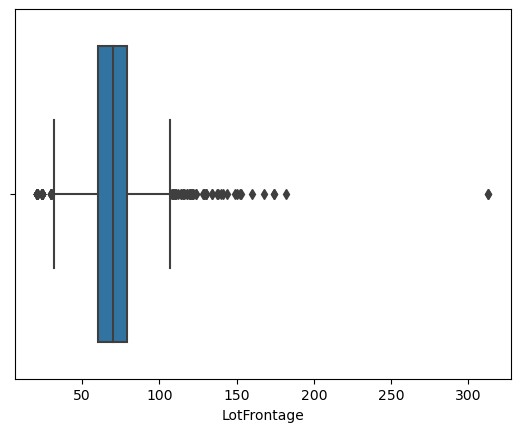

In [22]:
import seaborn as sns
sns.boxplot(x='LotFrontage', data=df_encoded)

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

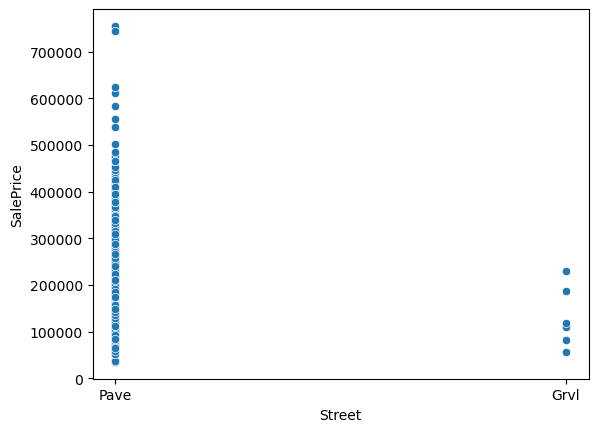

In [23]:
sns.scatterplot(x='Street', y='SalePrice', data=train_data)


<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

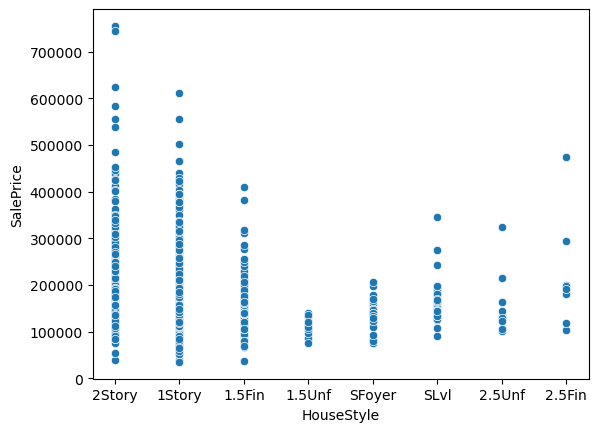

In [24]:
sns.scatterplot(x='HouseStyle', y='SalePrice', data=train_data)


<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

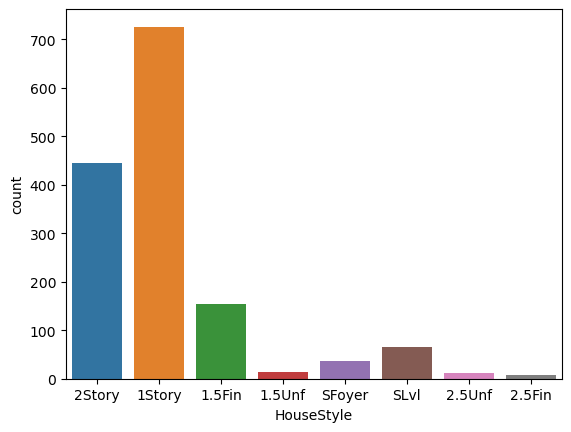

In [25]:
sns.countplot(x='HouseStyle', data=train_data)


### Correlation matrix

understand the relationship between independent variables , if two variables have a positive coeficient of correlation it means that when the one increase the other increase , if they have negative coff it means when the one increase the other decrease

### it is recommended to apply the matrix after processing data ( missing values and categorical data)

<AxesSubplot:>

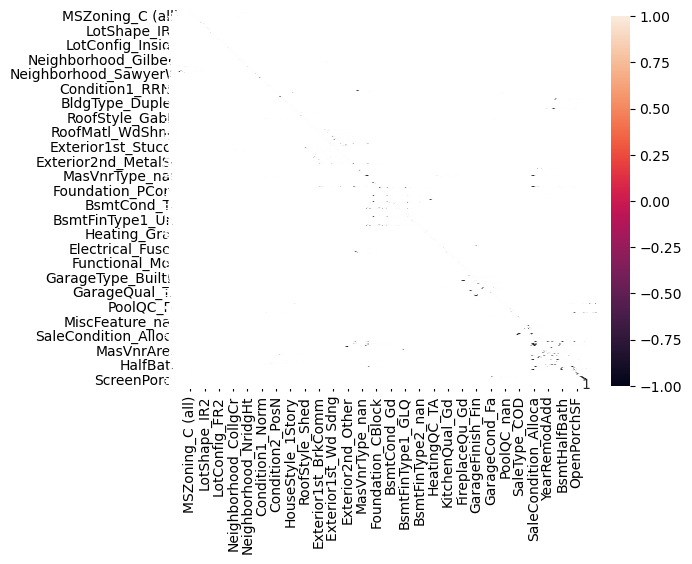

In [26]:
# Create a correlation matrix
corr_matrix = df_encoded.corr()

# Visualize the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True)

In [27]:
train_data.groupby('HouseStyle')['SalePrice'].mean()

HouseStyle
1.5Fin    143116.740260
1.5Unf    110150.000000
1Story    175985.477961
2.5Fin    220000.000000
2.5Unf    157354.545455
2Story    210051.764045
SFoyer    135074.486486
SLvl      166703.384615
Name: SalePrice, dtype: float64

In [28]:
train_data.groupby('Neighborhood')['SalePrice'].mean()

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

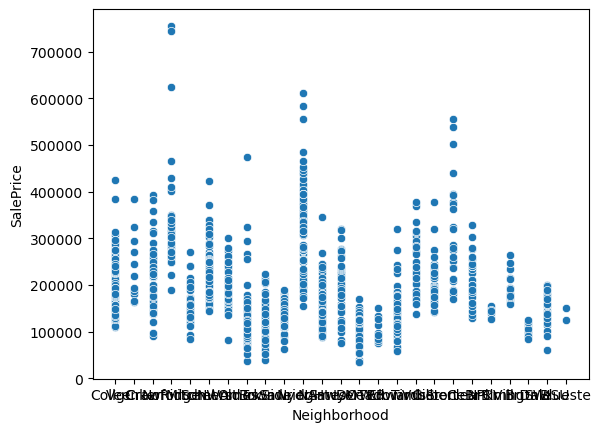

In [29]:
sns.scatterplot(x='Neighborhood', y='SalePrice', data=train_data)

### Machine learning algorithm 

In [30]:
from sklearn.model_selection import train_test_split


In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded,y_train_data, test_size=0.3, random_state=42)

In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1022, 305)
(1022,)
(438, 305)
(438,)


In [33]:
from sklearn.ensemble import GradientBoostingRegressor

# Build the Gradient Boosting model
model = GradientBoostingRegressor()

# Train the model on the training set
model.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


GradientBoostingRegressor()

In [34]:
# Make predictions on the testing set
y_pred = model.predict(X_test)



/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
# Tune the model by adjusting hyperparameters
model = GradientBoostingRegressor(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    random_state=42
)

In [37]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train the model
model.fit(X_train_scaled , y_train)

# Make predictions on test set
y_pred = model.predict(X_test_scaled)


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


In [38]:
y_pred.shape
y_train.shape

(1022,)

In [39]:
from sklearn.metrics import mean_squared_error

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

MSE: 646455715.4369017
